## 퍼셉트론
- 입력 데이터를 2개의 부류중 하나로 분류하는 분류기(classifier)
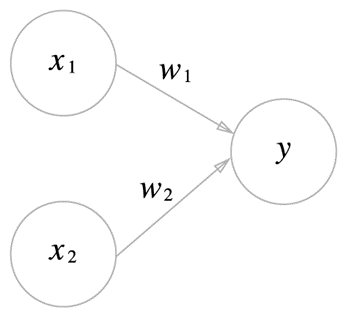

### AND, OR, NAD 게이트를 퍼셉트론으로 구현해 보자

**AND Gate 진리값**
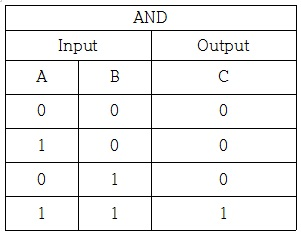

In [2]:
def ANDGate(x1, x2): 
#     w1, w2, b = ?, ?, ?
#     w1, w2, b = 1, 1, -1
    w1, w2, b = 0.5, 0.5, -0.7 # 가중치
    
    y = x1 * w1 + x2 * w2 +b  # 선형회귀 공식
    print('y는',y)
    if y <= 0 :
        return 0
    elif y >0 :
        return 1 
    
print(ANDGate(0,0))  # 0
print(ANDGate(0,1))  # 0
print(ANDGate(1,0))  # 0
print(ANDGate(1,1))  # 1         

y는 -0.7
0
y는 -0.19999999999999996
0
y는 -0.19999999999999996
0
y는 0.30000000000000004
1


**NAND Gate 진리값**
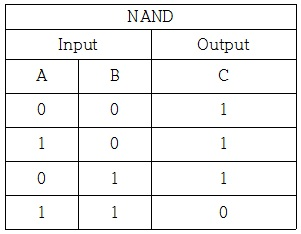

In [3]:
def NANDGate(x1, x2):
    w1, w2, b = -0.5, -0.5, 0.7
    
    
    y = x1 * w1 + x2 * w2 + b
    
    if y <= 0 :
        return 0
    elif y > 0 :
        return 1
    
print(NANDGate(0,0))  # 1
print(NANDGate(0,1))  # 1
print(NANDGate(1,0))  # 1
print(NANDGate(1,1))  # 0   

1
1
1
0


**OR Gate 진리값**
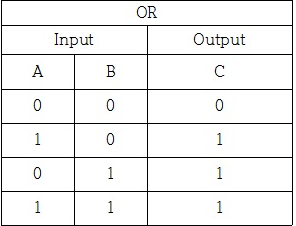

In [4]:
def ORGate(x1, x2):
    w1, w2, b = 0.8, 0.8, -0.1   
    
    y = x1 * w1 + x2 * w2 + b
    
    if y <= 0 :
        return 0
    elif y > 0 :
        return 1
    
print(ORGate(0,0))  # 0
print(ORGate(0,1))  # 1
print(ORGate(1,0))  # 1
print(ORGate(1,1))  # 1    

0
1
1
1


**XOR Gate 진리값**
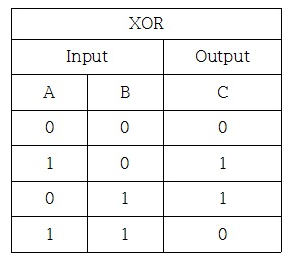

In [5]:
# XOR Gate는 다른 게이트에서 사용한 식을 그대로 사용했을 때 진리값에 대한 가중치를 
# 찾을 수 없음 - 선형식으로는 문제 해결이 불가능 했음
# 다층 퍼셉트론
# 모든 문제가 선형식으로만 해결을 할 수는 없음
# 뉴런이 찾은 선형식을 그대로 다음 뉴런의 인풋으로 보내면 아페서 전달된 선형식이 
# 무의미 해질 수 있음 - 활성화함수를 써서 비선형으로 약간 비틀어야함
def XORGate(x1,x2) : 
    s1 = NANDGate(x1, x2) # 1개의 뉴런 -> NAND의 특징
    s2 = ORGate(x1, x2) # 1개의 뉴런 -> OR의 특징
    y = ANDGate(s1, s2) # 1개의 뉴런 -> AND의 특징
    
    return y
#     w1, w2, b = ?, ?, ? 
    
#     y = x1 * w1 + x2 * w2 + b
    
#     if y <= 0 :
#         return 0
#     elif y > 0 :
#         return 1
    
print(XORGate(0,0))  # 0
print(XORGate(0,1))  # 1
print(XORGate(1,0))  # 1
print(XORGate(1,1))  # 0    

y는 -0.19999999999999996
0
y는 0.30000000000000004
1
y는 0.30000000000000004
1
y는 -0.19999999999999996
0


# 인공 신경망

### 딥러닝
- 기계가 병렬적 다층 구조를 통해 학습하도록 만든 기술
    - 사람이 추상적으로 모호하게 판단하는 것에 비해 기계는 판단하는 기준이 명확하게 정해져 있어서 정확한 수치로 나타내므로 
        - 여러 다층 구조를 통해 학습한 내용을 정해진 기준으로 판단하여 결과를 내놓게 함

### 인공신경망
    - 선형회귀 + Rogistic Regression의 개념을 차출해서 생성
    - 대량의 W와 b를 사용하므로 과적합이 자주 발생할 수 있음

### AND 논리를 학습하여 이해하는 간단한 신경망 예제

- AND 논리
    - a,b 두 값이 있다고 할 때
        - 두 값 모두 참이면 참, 아니면 거짓

In [10]:
# !pip install tensorflow

In [9]:
import tensorflow as tf

print(tf.__version__)

2.14.0


In [11]:
import pandas as pd
import numpy as np

In [15]:
# AND 논리 data
X_data = [[0, 0], [0, 1], [1, 0], [1, 1]] 
y = [0, 0, 0, 1] # 진리값

In [19]:
import tensorflow as tf
from tensorflow import keras

# Sequential : 신경망프레임 모듈
from keras.models import Sequential
# Dense : 신경망 층을 정의하는 모듈
from keras.layers import Dense # Dense 모듈에 activation이 파라미터로 결함됨

In [21]:
# 신경망 생성
and_model = Sequential()

# 한개의 층을 갖고 있는 ANDGate
# 신경망에 층을 추가 (add())
# Dense(units = 뉴런수, input_dim = 입력개수(특성수 : X_Data의 두 값))
# and_model.add(Dense(units = 1, input_dim = 2, activation = 'sigmoid')) 아래꺼를 더 많이 쓴다
and_model.add(Dense(units = 1, input_shape = (2, ), activation = 'sigmoid'))

# 입력은 두 개(a,b) , 출력은  하나(y)
# 신경망에 출력을 위한 활성화 함수를 추가
# sigmoid : 입력에 곱해서 출력을 계산(분류문제 이미로 값을 0~1로 변경시키는 역할)


# 신경망 구조를 출력
and_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- y = Wx + b : 기본 공식
- 현재 입력은 x1, x2 : y = Wx1 + Wx2 + b
- 파라미터 : 모델에서 나오는 모든 아웃풋 입력수 * 출력수 + 출력수 = 2 * 1 + 1

In [22]:
# compile(loss = '손실함수', optimizer = '최적화함수', metrics = '평가함수') 함수 사용
and_model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### fit()
- fit(x, y, epochs = n, batch_size = n)
- epochs : 모든데이터의 학습을 몇번할것인지(반복횟수)
    - 모든 데이터를 다봐야 1번의 epochs
- bath_size : 한번에 몇개의 data를 볼것인지

In [27]:
# fit() 
and_model.fit(x = X_data, y = y, epochs = 2000, batch_size = 4)

Epoch 1/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.7500
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.7500
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.7500
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6749 - accuracy: 0.7500
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.7500
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.7500
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6739 - accuracy: 0.7500
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6736 - accuracy: 0.7500
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6733 - accuracy: 0.7500
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6729 - accuracy: 0.7500
Epoch 11/2000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.7500
Epoch 84/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.7500
Epoch 85/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.7500
Epoch 86/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6502 - accuracy: 0.7500
Epoch 87/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6499 - accuracy: 0.7500
Epoch 88/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.7500
Epoch 89/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6493 - accuracy: 0.7500
Epoch 90/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6491 - accuracy: 0.7500
Epoch 91/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6488 - accuracy: 0.7500
Epoch 92/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6485 - accuracy: 0.7500
Epoch 93/2000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.7500
Epoch 166/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6297 - accuracy: 0.7500
Epoch 167/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.7500
Epoch 168/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6292 - accuracy: 0.7500
Epoch 169/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.7500
Epoch 170/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.7500
Epoch 171/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6285 - accuracy: 0.7500
Epoch 172/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6283 - accuracy: 0.7500
Epoch 173/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6280 - accuracy: 0.7500
Epoch 174/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.7500
Epoch 175/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6114 - accuracy: 0.7500
Epoch 248/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6111 - accuracy: 0.7500
Epoch 249/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6109 - accuracy: 0.7500
Epoch 250/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.7500
Epoch 251/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6105 - accuracy: 0.7500
Epoch 252/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6103 - accuracy: 0.7500
Epoch 253/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6101 - accuracy: 0.7500
Epoch 254/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6099 - accuracy: 0.7500
Epoch 255/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6096 - accuracy: 0.7500
Epoch 256/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6094 - accuracy: 0.7500
Epoch 257/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.5944 - accuracy: 0.7500
Epoch 330/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5942 - accuracy: 0.7500
Epoch 331/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5940 - accuracy: 0.7500
Epoch 332/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5938 - accuracy: 0.7500
Epoch 333/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5936 - accuracy: 0.7500
Epoch 334/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5934 - accuracy: 0.7500
Epoch 335/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5932 - accuracy: 0.7500
Epoch 336/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5930 - accuracy: 0.7500
Epoch 337/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.7500
Epoch 338/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5926 - accuracy: 0.7500
Epoch 339/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7500
Epoch 412/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5784 - accuracy: 0.7500
Epoch 413/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5782 - accuracy: 0.7500
Epoch 414/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5780 - accuracy: 0.7500
Epoch 415/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5778 - accuracy: 0.7500
Epoch 416/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5777 - accuracy: 0.7500
Epoch 417/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.7500
Epoch 418/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.7500
Epoch 419/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5771 - accuracy: 0.7500
Epoch 420/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5769 - accuracy: 0.7500
Epoch 421/2000


1/1 [==============================] - 0s 8ms/step - loss: 0.5638 - accuracy: 0.7500
Epoch 494/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5636 - accuracy: 0.7500
Epoch 495/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7500
Epoch 496/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5633 - accuracy: 0.7500
Epoch 497/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 498/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 499/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 500/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 501/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 502/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5622 - accuracy: 0.7500
Epoch 503/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7500
Epoch 576/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5497 - accuracy: 0.7500
Epoch 577/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7500
Epoch 578/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5494 - accuracy: 0.7500
Epoch 579/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.7500
Epoch 580/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5491 - accuracy: 0.7500
Epoch 581/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5489 - accuracy: 0.7500
Epoch 582/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5487 - accuracy: 0.7500
Epoch 583/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5486 - accuracy: 0.7500
Epoch 584/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5484 - accuracy: 0.7500
Epoch 585/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.5368 - accuracy: 1.0000
Epoch 658/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5366 - accuracy: 1.0000
Epoch 659/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5365 - accuracy: 1.0000
Epoch 660/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5363 - accuracy: 1.0000
Epoch 661/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5362 - accuracy: 1.0000
Epoch 662/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5360 - accuracy: 1.0000
Epoch 663/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5359 - accuracy: 1.0000
Epoch 664/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5357 - accuracy: 1.0000
Epoch 665/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5355 - accuracy: 1.0000
Epoch 666/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5354 - accuracy: 1.0000
Epoch 667/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 1.0000
Epoch 740/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 1.0000
Epoch 741/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5241 - accuracy: 1.0000
Epoch 742/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5239 - accuracy: 1.0000
Epoch 743/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5238 - accuracy: 1.0000
Epoch 744/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5236 - accuracy: 1.0000
Epoch 745/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5235 - accuracy: 1.0000
Epoch 746/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5233 - accuracy: 1.0000
Epoch 747/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 1.0000
Epoch 748/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5230 - accuracy: 1.0000
Epoch 749/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 1.0000
Epoch 822/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5124 - accuracy: 1.0000
Epoch 823/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5123 - accuracy: 1.0000
Epoch 824/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5121 - accuracy: 1.0000
Epoch 825/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 1.0000
Epoch 826/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5119 - accuracy: 1.0000
Epoch 827/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5117 - accuracy: 1.0000
Epoch 828/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5116 - accuracy: 1.0000
Epoch 829/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5114 - accuracy: 1.0000
Epoch 830/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5113 - accuracy: 1.0000
Epoch 831/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.5013 - accuracy: 1.0000
Epoch 904/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5011 - accuracy: 1.0000
Epoch 905/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5010 - accuracy: 1.0000
Epoch 906/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 1.0000
Epoch 907/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5007 - accuracy: 1.0000
Epoch 908/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5006 - accuracy: 1.0000
Epoch 909/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5005 - accuracy: 1.0000
Epoch 910/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5003 - accuracy: 1.0000
Epoch 911/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5002 - accuracy: 1.0000
Epoch 912/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5001 - accuracy: 1.0000
Epoch 913/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.4904 - accuracy: 1.0000
Epoch 986/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4903 - accuracy: 1.0000
Epoch 987/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4902 - accuracy: 1.0000
Epoch 988/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4901 - accuracy: 1.0000
Epoch 989/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4899 - accuracy: 1.0000
Epoch 990/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4898 - accuracy: 1.0000
Epoch 991/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4897 - accuracy: 1.0000
Epoch 992/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 1.0000
Epoch 993/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4894 - accuracy: 1.0000
Epoch 994/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4893 - accuracy: 1.0000
Epoch 995/2000


1/1 [==============================] - 0s 8ms/step - loss: 0.4801 - accuracy: 1.0000
Epoch 1067/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 1.0000
Epoch 1068/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4799 - accuracy: 1.0000
Epoch 1069/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4798 - accuracy: 1.0000
Epoch 1070/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4796 - accuracy: 1.0000
Epoch 1071/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 1.0000
Epoch 1072/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4794 - accuracy: 1.0000
Epoch 1073/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 1.0000
Epoch 1074/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4791 - accuracy: 1.0000
Epoch 1075/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 1.0000
Epoch 1148/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 1.0000
Epoch 1149/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4699 - accuracy: 1.0000
Epoch 1150/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4698 - accuracy: 1.0000
Epoch 1151/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4697 - accuracy: 1.0000
Epoch 1152/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 1.0000
Epoch 1153/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4694 - accuracy: 1.0000
Epoch 1154/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4693 - accuracy: 1.0000
Epoch 1155/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4692 - accuracy: 1.0000
Epoch 1156/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4691 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4605 - accuracy: 1.0000
Epoch 1229/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 1.0000
Epoch 1230/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4603 - accuracy: 1.0000
Epoch 1231/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4601 - accuracy: 1.0000
Epoch 1232/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4600 - accuracy: 1.0000
Epoch 1233/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4599 - accuracy: 1.0000
Epoch 1234/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4598 - accuracy: 1.0000
Epoch 1235/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4597 - accuracy: 1.0000
Epoch 1236/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4596 - accuracy: 1.0000
Epoch 1237/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4594 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.4511 - accuracy: 1.0000
Epoch 1310/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4510 - accuracy: 1.0000
Epoch 1311/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 1.0000
Epoch 1312/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4507 - accuracy: 1.0000
Epoch 1313/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4506 - accuracy: 1.0000
Epoch 1314/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4505 - accuracy: 1.0000
Epoch 1315/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4504 - accuracy: 1.0000
Epoch 1316/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4503 - accuracy: 1.0000
Epoch 1317/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4502 - accuracy: 1.0000
Epoch 1318/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4501 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4419 - accuracy: 1.0000
Epoch 1391/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 1.0000
Epoch 1392/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 1.0000
Epoch 1393/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4416 - accuracy: 1.0000
Epoch 1394/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4415 - accuracy: 1.0000
Epoch 1395/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 1.0000
Epoch 1396/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4413 - accuracy: 1.0000
Epoch 1397/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4412 - accuracy: 1.0000
Epoch 1398/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4410 - accuracy: 1.0000
Epoch 1399/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4409 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4330 - accuracy: 1.0000
Epoch 1472/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4329 - accuracy: 1.0000
Epoch 1473/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4328 - accuracy: 1.0000
Epoch 1474/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4327 - accuracy: 1.0000
Epoch 1475/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4326 - accuracy: 1.0000
Epoch 1476/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4325 - accuracy: 1.0000
Epoch 1477/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4324 - accuracy: 1.0000
Epoch 1478/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4323 - accuracy: 1.0000
Epoch 1479/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4321 - accuracy: 1.0000
Epoch 1480/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4320 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 1.0000
Epoch 1553/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 1.0000
Epoch 1554/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4241 - accuracy: 1.0000
Epoch 1555/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4240 - accuracy: 1.0000
Epoch 1556/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4239 - accuracy: 1.0000
Epoch 1557/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4238 - accuracy: 1.0000
Epoch 1558/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4237 - accuracy: 1.0000
Epoch 1559/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4236 - accuracy: 1.0000
Epoch 1560/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4235 - accuracy: 1.0000
Epoch 1561/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4234 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4158 - accuracy: 1.0000
Epoch 1634/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy: 1.0000
Epoch 1635/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4156 - accuracy: 1.0000
Epoch 1636/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 1.0000
Epoch 1637/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 1.0000
Epoch 1638/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4153 - accuracy: 1.0000
Epoch 1639/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4152 - accuracy: 1.0000
Epoch 1640/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4151 - accuracy: 1.0000
Epoch 1641/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4150 - accuracy: 1.0000
Epoch 1642/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4149 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 1.0000
Epoch 1715/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4074 - accuracy: 1.0000
Epoch 1716/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4073 - accuracy: 1.0000
Epoch 1717/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4072 - accuracy: 1.0000
Epoch 1718/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4071 - accuracy: 1.0000
Epoch 1719/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4070 - accuracy: 1.0000
Epoch 1720/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4069 - accuracy: 1.0000
Epoch 1721/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4068 - accuracy: 1.0000
Epoch 1722/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4067 - accuracy: 1.0000
Epoch 1723/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4066 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.3994 - accuracy: 1.0000
Epoch 1796/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3993 - accuracy: 1.0000
Epoch 1797/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3992 - accuracy: 1.0000
Epoch 1798/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3991 - accuracy: 1.0000
Epoch 1799/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 1.0000
Epoch 1800/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3989 - accuracy: 1.0000
Epoch 1801/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3988 - accuracy: 1.0000
Epoch 1802/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3987 - accuracy: 1.0000
Epoch 1803/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3986 - accuracy: 1.0000
Epoch 1804/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3985 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 1.0000
Epoch 1877/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3914 - accuracy: 1.0000
Epoch 1878/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3913 - accuracy: 1.0000
Epoch 1879/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3912 - accuracy: 1.0000
Epoch 1880/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3911 - accuracy: 1.0000
Epoch 1881/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3910 - accuracy: 1.0000
Epoch 1882/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3909 - accuracy: 1.0000
Epoch 1883/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3908 - accuracy: 1.0000
Epoch 1884/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3908 - accuracy: 1.0000
Epoch 1885/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3907 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.3838 - accuracy: 1.0000
Epoch 1958/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3837 - accuracy: 1.0000
Epoch 1959/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3836 - accuracy: 1.0000
Epoch 1960/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3835 - accuracy: 1.0000
Epoch 1961/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3834 - accuracy: 1.0000
Epoch 1962/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 1.0000
Epoch 1963/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3832 - accuracy: 1.0000
Epoch 1964/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3831 - accuracy: 1.0000
Epoch 1965/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3830 - accuracy: 1.0000
Epoch 1966/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 1.0000
Epoch 

### fit() process
1. 파라미터 초기화(random) w, b
2. 입력값 입력 -> 추론 -> y
3. 추론값 y와 정답 y오차 계산
4. 오차에 대해 입력값 반영 미분 -> 기울기 조정(경사하강법)
5. 오차역전파로 가중치 갱신 정보를 보냄
6. 가중치 갱신 : 기존 w +/- 가중치 갱신정보 -> 새로운 w
7. 2번부터 6번과정 계속 반복

In [28]:
### 예측
X_test = [[0,1],[1,1],[1,0],[0,0],[1,1]]
y_test = [0,1,0,0,1]

pred = and_model.predict(X_test)
pred

1/1 [==============================] - 0s 95ms/step


array([[0.35758275],
       [0.61099374],
       [0.34014553],
       [0.15446417],
       [0.61099374]], dtype=float32)

In [29]:
# 평가
print("score :", and_model.evaluate(X_test, y_test))


1/1 [==============================] - 0s 167ms/step - loss: 0.4023 - accuracy: 1.0000
score : [0.4022749960422516, 1.0]


### 직접 실습
- AND 모델을 기준으로
- OR 논리의 신경망 모델을 생성하기
- XOR 논리의 신경망 모델을 생성하기

In [51]:
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_and = [0, 0, 0, 1]
y_or = [0, 1, 1, 1]
y_xor = [0, 1, 1, 0]

In [52]:
model_base_and = Sequential()
model_base_and.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
model_base_and.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [53]:
model_base.fit(x = x_data, y = y_and, epochs = 500, batch_size = 4)

Epoch 1/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5929 - accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5927 - accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5926 - accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5924 - accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5922 - accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5921 - accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5919 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5917 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5916 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5914 - accuracy: 1.0000
Epoch 11/500
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.5794 - accuracy: 1.0000
Epoch 85/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5792 - accuracy: 1.0000
Epoch 86/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5790 - accuracy: 1.0000
Epoch 87/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5789 - accuracy: 1.0000
Epoch 88/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 1.0000
Epoch 89/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 1.0000
Epoch 90/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5784 - accuracy: 1.0000
Epoch 91/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5782 - accuracy: 1.0000
Epoch 92/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5781 - accuracy: 1.0000
Epoch 93/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5779 - accuracy: 1.0000
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 0.5661 - accuracy: 1.0000
Epoch 168/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5659 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5658 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5656 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5654 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 1.0000
Epoch 173/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 1.0000
Epoch 174/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5648 - accuracy: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5646 - accuracy: 1.0000
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.5532 - accuracy: 1.0000
Epoch 250/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 1.0000
Epoch 251/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5529 - accuracy: 1.0000
Epoch 252/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5527 - accuracy: 1.0000
Epoch 253/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 1.0000
Epoch 254/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5524 - accuracy: 1.0000
Epoch 255/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5522 - accuracy: 1.0000
Epoch 256/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5521 - accuracy: 1.0000
Epoch 257/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5519 - accuracy: 1.0000
Epoch 258/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5518 - accuracy: 1.0000
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.5405 - accuracy: 1.0000
Epoch 332/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5404 - accuracy: 1.0000
Epoch 333/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 1.0000
Epoch 334/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5401 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5399 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5398 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5396 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5395 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5393 - accuracy: 1.0000
Epoch 340/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5392 - accuracy: 1.0000
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.5281 - accuracy: 1.0000
Epoch 414/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5280 - accuracy: 1.0000
Epoch 415/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5278 - accuracy: 1.0000
Epoch 416/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5277 - accuracy: 1.0000
Epoch 417/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5275 - accuracy: 1.0000
Epoch 418/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 1.0000
Epoch 419/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5273 - accuracy: 1.0000
Epoch 420/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 1.0000
Epoch 421/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5270 - accuracy: 1.0000
Epoch 422/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5268 - accuracy: 1.0000
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.5161 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5159 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5158 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5156 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5155 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5153 - accuracy: 1.0000


In [54]:
model_base_or = Sequential()
model_base_or.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
model_base_or.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [55]:
model_base.fit(x = x_data, y = y_or, epochs = 500, batch_size = 4)

Epoch 1/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6855 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6824 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6788 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6767 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6722 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6697 - accuracy: 0.5000
Epoch 11/500
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.5273 - accuracy: 1.0000
Epoch 85/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5261 - accuracy: 1.0000
Epoch 86/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5248 - accuracy: 1.0000
Epoch 87/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5236 - accuracy: 1.0000
Epoch 88/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5224 - accuracy: 1.0000
Epoch 89/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5211 - accuracy: 1.0000
Epoch 90/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5199 - accuracy: 1.0000
Epoch 91/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5187 - accuracy: 1.0000
Epoch 92/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 1.0000
Epoch 93/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 1.0000
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.4491 - accuracy: 1.0000
Epoch 168/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4477 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4470 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4463 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 1.0000
Epoch 173/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4449 - accuracy: 1.0000
Epoch 174/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4442 - accuracy: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4436 - accuracy: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 1.0000
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 1.0000
Epoch 250/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4007 - accuracy: 1.0000
Epoch 251/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4002 - accuracy: 1.0000
Epoch 252/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3998 - accuracy: 1.0000
Epoch 253/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3993 - accuracy: 1.0000
Epoch 254/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3988 - accuracy: 1.0000
Epoch 255/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3983 - accuracy: 1.0000
Epoch 256/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3979 - accuracy: 1.0000
Epoch 257/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 1.0000
Epoch 258/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3969 - accuracy: 1.0000
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.3676 - accuracy: 1.0000
Epoch 332/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3673 - accuracy: 1.0000
Epoch 333/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3669 - accuracy: 1.0000
Epoch 334/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3666 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3662 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3659 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3655 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3652 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3649 - accuracy: 1.0000
Epoch 340/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3645 - accuracy: 1.0000
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.3426 - accuracy: 1.0000
Epoch 414/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3423 - accuracy: 1.0000
Epoch 415/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 1.0000
Epoch 416/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3418 - accuracy: 1.0000
Epoch 417/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3415 - accuracy: 1.0000
Epoch 418/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3413 - accuracy: 1.0000
Epoch 419/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3410 - accuracy: 1.0000
Epoch 420/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3408 - accuracy: 1.0000
Epoch 421/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3405 - accuracy: 1.0000
Epoch 422/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3402 - accuracy: 1.0000
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 0.3232 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3230 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3228 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3226 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3221 - accuracy: 1.0000


In [56]:
model_base_xor = Sequential()
model_base_xor.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
model_base_xor.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
model_base.fit(x = x_data, y = y_xor, epochs = 500, batch_size = 4)

Epoch 1/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8762 - accuracy: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8765 - accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8766 - accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8767 - accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8767 - accuracy: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8767 - accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8766 - accuracy: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8765 - accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8763 - accuracy: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8761 - accuracy: 0.7500
Epoch 11/500
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.8403 - accuracy: 0.7500
Epoch 85/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8398 - accuracy: 0.7500
Epoch 86/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8394 - accuracy: 0.7500
Epoch 87/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8389 - accuracy: 0.7500
Epoch 88/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8385 - accuracy: 0.7500
Epoch 89/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8380 - accuracy: 0.7500
Epoch 90/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8376 - accuracy: 0.7500
Epoch 91/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8371 - accuracy: 0.7500
Epoch 92/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8367 - accuracy: 0.7500
Epoch 93/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8362 - accuracy: 0.7500
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.8070 - accuracy: 0.7500
Epoch 168/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8067 - accuracy: 0.7500
Epoch 169/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8063 - accuracy: 0.7500
Epoch 170/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8060 - accuracy: 0.7500
Epoch 171/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8056 - accuracy: 0.7500
Epoch 172/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8053 - accuracy: 0.7500
Epoch 173/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8050 - accuracy: 0.7500
Epoch 174/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8046 - accuracy: 0.7500
Epoch 175/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8043 - accuracy: 0.7500
Epoch 176/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8040 - accuracy: 0.7500
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.7827 - accuracy: 0.7500
Epoch 250/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7824 - accuracy: 0.7500
Epoch 251/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7821 - accuracy: 0.7500
Epoch 252/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7819 - accuracy: 0.7500
Epoch 253/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7816 - accuracy: 0.7500
Epoch 254/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7814 - accuracy: 0.7500
Epoch 255/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7811 - accuracy: 0.7500
Epoch 256/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7809 - accuracy: 0.7500
Epoch 257/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7806 - accuracy: 0.7500
Epoch 258/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7804 - accuracy: 0.7500
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.7648 - accuracy: 0.7500
Epoch 332/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7646 - accuracy: 0.7500
Epoch 333/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7644 - accuracy: 0.7500
Epoch 334/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7642 - accuracy: 0.7500
Epoch 335/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7640 - accuracy: 0.7500
Epoch 336/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7639 - accuracy: 0.7500
Epoch 337/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7637 - accuracy: 0.7500
Epoch 338/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7635 - accuracy: 0.7500
Epoch 339/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7633 - accuracy: 0.7500
Epoch 340/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7631 - accuracy: 0.7500
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.7518 - accuracy: 0.7500
Epoch 414/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7517 - accuracy: 0.7500
Epoch 415/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7515 - accuracy: 0.7500
Epoch 416/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7514 - accuracy: 0.7500
Epoch 417/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7513 - accuracy: 0.7500
Epoch 418/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7511 - accuracy: 0.7500
Epoch 419/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7510 - accuracy: 0.7500
Epoch 420/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7509 - accuracy: 0.7500
Epoch 421/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7507 - accuracy: 0.7500
Epoch 422/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7506 - accuracy: 0.7500
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.7424 - accuracy: 0.7500
Epoch 496/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7423 - accuracy: 0.7500
Epoch 497/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7422 - accuracy: 0.7500
Epoch 498/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7421 - accuracy: 0.7500
Epoch 499/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7421 - accuracy: 0.7500
Epoch 500/500
1/1 [==============================] - 0s 6ms/step - loss: 0.7420 - accuracy: 0.7500


### XOR 논리를 학습하여 이해하는 간단한 신경망 예제 
- XOR 논리
    - a,b 두 값이 있다고 할 때
        - 두 값 모두 참이거나 거짓이면 거짓, 두 값이 다르면 참

In [64]:
X_xor = [[0,0],[0,1],[1,0],[1,1]]
y_xor = [0,1,1,0]

In [65]:
# 신경망 설계
model_base_xor = Sequential()
model_base_xor.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))

In [61]:
# 컴파일
model_base_xor.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 학습
model_base_xor.fit(x = X_xor, y = y_xor, epochs = 2000, batch_size = 4)

Epoch 1/2000
1/1 [==============================] - 0s 394ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 11/2000
1/1

1/1 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 84/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 85/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 86/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 87/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 88/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 89/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 90/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 91/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 92/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 93/2000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 166/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 167/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 168/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 169/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 170/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 171/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 172/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 173/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 174/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 175/2000


1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 248/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 249/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 250/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 251/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 252/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 253/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 254/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 255/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 256/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 257/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 330/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 331/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 332/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 333/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 334/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 335/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 336/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 337/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 338/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 339/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 412/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 413/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 414/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 415/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 416/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.7500
Epoch 417/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.7500
Epoch 418/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 419/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 420/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 421/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 494/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 495/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 496/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 497/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 498/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 499/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 500/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 501/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 502/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 503/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 576/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 577/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 578/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 579/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 580/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 581/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 582/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 583/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 584/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 585/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 658/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 659/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 660/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 661/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 662/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 663/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 664/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 665/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 666/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 667/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 740/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 741/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 742/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 743/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 744/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 745/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 746/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 747/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 748/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 749/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 822/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 823/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 824/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 825/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 826/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 827/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 828/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 829/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 830/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 831/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 904/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 905/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 906/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 907/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 908/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 909/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 910/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 911/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 912/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 913/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 986/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 987/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 988/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 989/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 990/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 991/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 992/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 993/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 994/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 995/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1067/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1068/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1069/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1070/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1071/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1072/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1073/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1074/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1075/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1148/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1149/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1150/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1151/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1152/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1153/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1154/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1155/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1156/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1229/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1230/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1231/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1232/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1233/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1234/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1235/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1236/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1237/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1310/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1311/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1312/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1313/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1314/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1315/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1316/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1317/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1318/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1391/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1392/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1393/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1394/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1395/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1396/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1397/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1398/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1399/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1472/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1473/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1474/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1475/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1476/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1477/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1478/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1479/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1480/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1553/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1554/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1555/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1556/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1557/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1558/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1559/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1560/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1561/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1634/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1635/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1636/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1637/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1638/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1639/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1640/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1641/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1642/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1715/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1716/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1717/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1718/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1719/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1720/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1721/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1722/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1723/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1796/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1797/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1798/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1799/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1800/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1801/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1802/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1803/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1804/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1877/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1878/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1879/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1880/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1881/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1882/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1883/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1884/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1885/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1958/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1959/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1960/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1961/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1962/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1963/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1964/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1965/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1966/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

In [66]:
# 층을 2개로 늘려보기
# 다층 퍼셉트론
# 심층신경망
model_xorm = Sequential()
# 첫번째 층은 입력층 자동 생성을 위해서 input_shape을 설정해줘야 함(data feature)
model_xorm.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
# 두번째 층 부터는 이전층의 아웃풋이 다음 층의 input이 됨. input_shape 설정 필요 없음
model_xorm.add(Dense(units = 1, activation = 'sigmoid'))
model_xorm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# 컴파일
model_xorm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 학습
model_xorm.fit(x = X_xor, y = y_xor, epochs = 2000, batch_size = 4)

Epoch 1/2000
1/1 [==============================] - 1s 506ms/step - loss: 0.7302 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7300 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7298 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7296 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7294 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7292 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7290 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7289 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7287 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7285 - accuracy: 0.5000
Epoch 11/2000
1/

1/1 [==============================] - 0s 6ms/step - loss: 0.7168 - accuracy: 0.5000
Epoch 84/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7167 - accuracy: 0.5000
Epoch 85/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7165 - accuracy: 0.5000
Epoch 86/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7164 - accuracy: 0.5000
Epoch 87/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7163 - accuracy: 0.5000
Epoch 88/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7161 - accuracy: 0.5000
Epoch 89/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7160 - accuracy: 0.5000
Epoch 90/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7159 - accuracy: 0.5000
Epoch 91/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7157 - accuracy: 0.5000
Epoch 92/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7156 - accuracy: 0.5000
Epoch 93/2000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.7076 - accuracy: 0.5000
Epoch 166/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 167/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7074 - accuracy: 0.5000
Epoch 168/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7073 - accuracy: 0.5000
Epoch 169/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7072 - accuracy: 0.5000
Epoch 170/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7071 - accuracy: 0.5000
Epoch 171/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7071 - accuracy: 0.5000
Epoch 172/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7070 - accuracy: 0.5000
Epoch 173/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7069 - accuracy: 0.5000
Epoch 174/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7068 - accuracy: 0.5000
Epoch 175/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 248/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 249/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 250/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 251/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 252/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 253/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 254/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 255/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 256/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 257/2000

1/1 [==============================] - 0s 7ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 330/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 331/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 332/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 333/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 334/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 335/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 336/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 337/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 338/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 339/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 412/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 413/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 414/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 415/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 416/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 417/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 418/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 419/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 420/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 421/2000

1/1 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 494/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 495/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 496/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 497/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 498/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 499/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 500/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 501/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 502/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 503/2000


1/1 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 576/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 577/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 578/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 579/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 580/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 581/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 582/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 583/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 584/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 585/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 658/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 659/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 660/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 661/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 662/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 663/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 664/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 665/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 666/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 667/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 740/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 741/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 742/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 743/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 744/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 745/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 746/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 747/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 748/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.7500
Epoch 749/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 822/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 823/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 824/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 825/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 826/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 827/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 828/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 829/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 830/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.7500
Epoch 831/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 904/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 905/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 906/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 907/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 908/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 909/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 910/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 911/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 912/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 913/2000

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 986/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 987/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 988/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 989/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 990/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 991/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 992/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 993/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 994/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 995/2000

1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1067/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1068/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1069/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1070/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1071/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1072/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1073/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1074/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1075/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1148/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1149/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1150/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1151/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1152/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1153/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1154/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1155/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1156/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1229/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1230/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1231/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1232/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1233/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1234/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1235/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1236/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1237/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1310/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1311/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1312/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1313/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1314/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1315/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1316/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1317/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1318/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1391/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1392/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1393/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1394/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1395/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1396/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1397/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1398/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1399/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5000
Epo

1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1472/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1473/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1474/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1475/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1476/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1477/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1478/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1479/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1480/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1553/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1554/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1555/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1556/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1557/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1558/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1559/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1560/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1561/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1634/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1635/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1636/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1637/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1638/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1639/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 1640/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 1641/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 1642/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 1715/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 1716/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.5000
Epoch 1717/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6874 - accuracy: 0.5000
Epoch 1718/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5000
Epoch 1719/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5000
Epoch 1720/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.5000
Epoch 1721/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6872 - accuracy: 0.5000
Epoch 1722/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.5000
Epoch 1723/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 11ms/step - loss: 0.6832 - accuracy: 0.5000
Epoch 1796/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6832 - accuracy: 0.5000
Epoch 1797/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.5000
Epoch 1798/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6831 - accuracy: 0.5000
Epoch 1799/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6830 - accuracy: 0.5000
Epoch 1800/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6829 - accuracy: 0.5000
Epoch 1801/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6829 - accuracy: 0.5000
Epoch 1802/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.5000
Epoch 1803/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.5000
Epoch 1804/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6827 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 8ms/step - loss: 0.6777 - accuracy: 0.7500
Epoch 1877/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.7500
Epoch 1878/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6776 - accuracy: 0.7500
Epoch 1879/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6775 - accuracy: 0.7500
Epoch 1880/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.7500
Epoch 1881/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.7500
Epoch 1882/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.7500
Epoch 1883/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6772 - accuracy: 0.7500
Epoch 1884/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.7500
Epoch 1885/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.6711 - accuracy: 0.7500
Epoch 1958/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6711 - accuracy: 0.7500
Epoch 1959/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6710 - accuracy: 0.7500
Epoch 1960/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.7500
Epoch 1961/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6708 - accuracy: 0.7500
Epoch 1962/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.7500
Epoch 1963/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6706 - accuracy: 0.7500
Epoch 1964/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6705 - accuracy: 0.7500
Epoch 1965/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.7500
Epoch 1966/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6704 - accuracy: 0.7500
Epoch 

In [77]:
# 첫번째 층의 뉴런(unit)을 2개로
# 층을 2개로 늘려보기
# 다층 퍼셉트론
# 심층신경망
model_xorm = Sequential()
# 다층 퍼셉트론의 xor문제가 orgate, nandgate층과 andgate층 두층으로 되어 있고
# 첫번쨰 층의 unit(뉴런)이 2개인 모양이어서 
# 첫번째 층의 unit을 2개로 늘림
model_xorm.add(Dense(units = 2, input_shape = (2,), activation = 'sigmoid'))
model_xorm.add(Dense(units = 1, activation = 'sigmoid'))
model_xorm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# 컴파일
model_xorm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 학습
model_xorm.fit(x = X_xor, y = y_xor, epochs = 200, batch_size = 4)

Epoch 1/200
1/1 [==============================] - 1s 521ms/step - loss: 0.7017 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 11/200
1/1 [========

1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 85/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 86/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 87/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 88/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 89/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 90/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 91/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 92/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 93/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.7500
Epoch 94/200
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 168/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 169/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 170/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 171/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 172/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 173/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 174/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 175/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 176/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 177/200
1/1 [=====

#### 반복문을 통해 epochs 실행 확인

In [72]:
# !pip install tqdm
# 반복문에 연결해서 사용하면 반복이 상황(진행정도)을 알 수 있다

In [75]:
from tqdm.notebook import tqdm

In [81]:
for i in tqdm(range(200)):
    model_xorm.fit(x = X_xor, y = y_xor, epochs = 1, batch_size = 4)

  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5000


1/1 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5000


1/1 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.5000


- epochs 는 1번의 학습을 여러번 반복하는 의미

### 학습과정(fit(x, y, 반복횟수, 학습률)) 구현
1. 파라미터(가중치, 절편)을 초기화 (랜덤)
2. 데이터입력(식에 대입)
3. 추론(예측값을 구함) : x * w + b = y
4. 오차 : e = y(실제값) - y'(예측값)
5. 오차에 대해 예측값으로 미분(기울기)
6. 오차 역전파 : 기울기값을 기존 파라미터에 더해준다
    - 가중치 갱신
        - 기울기를 그대로 더해주면 파라미터 값이 크게 변함
        - 기울기에 일정 비율(학습률)만큼만 더해준다
7. epochs 수 만큼 2~6번을 반복

In [82]:
# 인공신경망 층(Dense) 1개로 구성도니 모델
import numpy as np
def fit_tmp(X, y, epochs, lr) :
    # 초기 파라미터(w, b) - 학습 시작시 한번
    w = np.random.rand(1)
    b = np.random.rand(1)
    
    # epochs만큼 반복 학습
    for i in range(epochs) :
        # 입력받은 X를 이용해서 y'를 추정(예측)
        pred_y = w * X + b # 하나의 층
        # 오차 계산
        error = y - pred_y
        print("반복수 : {}, 예측값 : {}, 오차 : {}".format(i, pred_y, error))
        # 기울기 계산
        d = error / pred_y
        # 기울기를 이용해서 w, b를 계산
        # 한꺼번에 가중치 수정하면 값이 갑자기 커지므로 일부비율(학습률)만큼만 적용시킴
        w = w + d * lr
        b = b + d * lr

In [83]:
fit_tmp(12, 3, 20, 0.1)

반복수 : 0, 예측값 : [11.86821837], 오차 : [-8.86821837]
반복수 : 1, 예측값 : [10.89682708], 오차 : [-7.89682708]
반복수 : 2, 예측값 : [9.95472943], 오차 : [-6.95472943]
반복수 : 3, 예측값 : [9.04650301], 오차 : [-6.04650301]
반복수 : 4, 예측값 : [8.17760882], 오차 : [-5.17760882]
반복수 : 5, 예측값 : [7.35452085], 오차 : [-4.35452085]
반복수 : 6, 예측값 : [6.58480692], 오차 : [-3.58480692]
반복수 : 7, 예측값 : [5.87707941], 오차 : [-2.87707941]
반복수 : 8, 예측값 : [5.24067433], 오차 : [-2.24067433]
반복수 : 9, 예측값 : [4.68485337], 오차 : [-1.68485337]
반복수 : 10, 예측값 : [4.21732339], 오차 : [-1.21732339]
반복수 : 11, 예측값 : [3.84208055], 오차 : [-0.84208055]
반복수 : 12, 예측값 : [3.55715557], 오차 : [-0.55715557]
반복수 : 13, 예측값 : [3.3535372], 오차 : [-0.3535372]
반복수 : 14, 예측값 : [3.21648836], 오차 : [-0.21648836]
반복수 : 15, 예측값 : [3.12899081], 오차 : [-0.12899081]
반복수 : 16, 예측값 : [3.07539907], 오차 : [-0.07539907]
반복수 : 17, 예측값 : [3.04352718], 오차 : [-0.04352718]
반복수 : 18, 예측값 : [3.02493515], 오차 : [-0.02493515]
반복수 : 19, 예측값 : [3.01421899], 오차 : [-0.01421899]
